Saving Financial DB.xlsx to Financial DB (5).xlsx
=== RESUMEN (metrics, area_counts, level_counts) ===
[
  {
    "Area_unique": 3,
    "ActivityGroup_unique": 7,
    "Activity_unique": 23,
    "Type_unique": 36
  },
  {
    "Revenue": 74,
    "COGS": 20,
    "OPEX": 8
  },
  {
    "Type": 74,
    "Activity": 22,
    "Activity Group": 6
  }
]
⚠️ No se encontró Times New Roman; se usará la predeterminada.


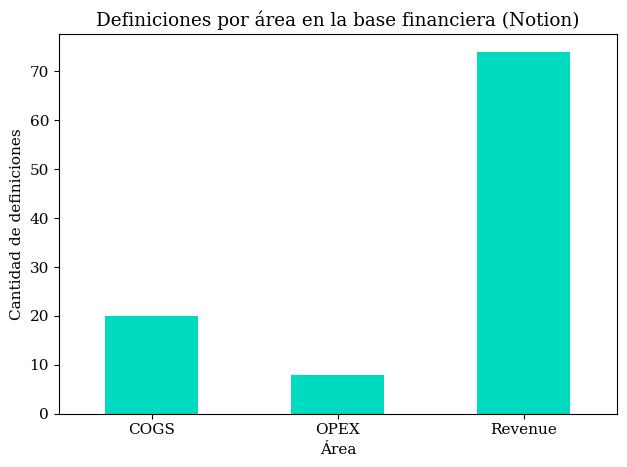

In [ ]:
#GRÁFICA Y SUMMARY DE BASE DE DATOS (FINANCIAL DEFINITIONS) DE NOTION:
#---------------------------------------------------------------------

# --- Cargar Excel vía upload y hacer resumen + gráfica (Colab) ---

# 1) Upload del archivo xlsx:
from google.colab import files
import io, json
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()  # Selecciona el Excel.
fname = next(iter(uploaded))  # Toma el primer archivo subido.

# 2) Leer el Excel (primera hoja por defecto)
xlsx_bytes = io.BytesIO(uploaded[fname])
xls = pd.ExcelFile(xlsx_bytes)
sheet_name = xls.sheet_names[0]
df = pd.read_excel(xlsx_bytes, sheet_name=sheet_name)

def uniq_counts(series):
    return series.dropna().nunique()

# --- Resumen solicitado ---
metrics = {
    "Area_unique": uniq_counts(df["Area"]),
    "ActivityGroup_unique": uniq_counts(df["Activity Group"]),
    "Activity_unique": uniq_counts(df["Activity"]),
    "Type_unique": uniq_counts(df["Type"]),
}

area_counts = df["Area"].value_counts()

level = []
for _, r in df.iterrows():
    if pd.notna(r["Type"]):
        level.append("Type")
    elif pd.notna(r["Activity"]):
        level.append("Activity")
    elif pd.notna(r["Activity Group"]):
        level.append("Activity Group")
    else:
        level.append("Area-only")

df["level"] = level
level_counts = df["level"].value_counts()

summary_tuple = (metrics, area_counts.to_dict(), level_counts.to_dict())

print("=== RESUMEN (metrics, area_counts, level_counts) ===")
print(json.dumps(summary_tuple, indent=2, ensure_ascii=False))

# --- Gráfica: Definiciones por área ---
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os, glob

# ✅ BLOQUE NUEVO — instalar Times New Roman real en Colab
!apt-get -qq install ttf-mscorefonts-installer fontconfig > /dev/null
os.system("fc-cache -f -v > /dev/null")

# Buscar Times New Roman
font_candidates = glob.glob("/usr/share/fonts/**/Times*.ttf", recursive=True)
if font_candidates:
    font_path = font_candidates[0]
    fm.fontManager.addfont(font_path)
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rcParams["font.family"] = font_name
    print(f"✅ Fuente aplicada: {font_name}")
else:
    print("⚠️ No se encontró Times New Roman; se usará la predeterminada.")
    plt.rcParams["font.family"] = "serif"

plt.rcParams["font.size"] = 11

# --- Gráfico ---
plt.figure()
area_counts.sort_index().plot(kind="bar", color="#00dbbf")
plt.title("Definiciones por área en la base financiera (Notion)")
plt.xlabel("Área")
plt.ylabel("Cantidad de definiciones")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




